## 1.) Khai báo thư viện

In [1]:
import pandas as pd 
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

## 2.) Tiền xử lý dữ liệu

In [2]:
data_Users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
data_Books = pd.read_csv('data/BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
data_Ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)
print(data_Users.shape, data_Books.shape, data_Ratings.shape)

(278858, 3) (271360, 8) (1149780, 3)


### 2.1) Xử lý dữ liệu về Users

In [3]:
data_Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
data_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
test = data_Users['Location'].str.split(',').str[-1].str.strip()
test.unique() # ", n/a, -------, ?ú?{, c, lkjlj, 87510, 23232, xxxxxx, l, 30064, in, \\n/a\\"", a, 85021, \\"n/a\\"", 01776, nl, x

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', '', 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', 'bosnia and herzegovina', 'vietnam', 'sri lanka',
       'pakistan', 'denmark', 'belgium', 'malaysia', 'u.a.e', 'turkey',
       'philippines', 'greece', 'colombia', 'norway', 'kuwait', 'chile',
       'quit', 'lj', 'taiwan', 'denmark"', 'españa', 'sweden',
       'argentina', 'nigeria', 'london', 'bulgaria', 'austria', 'romania',
       'singapore', 'albania', 'egypt', 'tunisia', 'uzbekistan', 'qatar',
       'syria', 'saudi arabia', 'indonesia', 'sudan', 'somewherein space',
       'poland', 'thailand', 'ireland', 'malaysia"', 'venezuela',
       'paraguay', 'mozambique', 'morocco', 'afghanistan', 'estonia',
       'clackamas', 'spain"', '"', 'lesotho', 'yugoslavia', 'slovakia',
   

In [6]:
key_works = ['#', 'n/a', '-------,', '?ú?{', 'c', 'lkjlj', '87510', '23232', 'xxxxxx', 'l', '30064', 'in', '\\n/a\\""', 'a', '85021', '\\"n/a\\""', '01776', 'nl', 'x']
def replace_with_unknown(str):
    if str in key_works:
        return 'unknown'
    return str

In [7]:
data_Users.drop(columns=['Age'], inplace=True)
data_Users['Location'] = data_Users['Location'].str.split(',').str[-1].str.strip()
data_Users['Location'] = data_Users['Location'].astype(str).apply(replace_with_unknown)
data_Users.rename(columns={"User-ID":'ID_User'}, inplace=True)
data_Users

,ID_User,Location
0,1,usa
1,2,usa
2,3,russia
3,4,portugal
4,5,united kingdom
...,...,...
278853,278854,usa
278854,278855,united kingdom
278855,278856,canada
278856,278857,usa


### 2.2) Xử lý dữ liệu về Books

In [8]:
data_Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
data_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
test = data_Books[data_Books['Book-Title'].str.len() < 3]['Book-Title']
test.unique()

array(['It', 'Q', 'K', 'e', 'S.', '7b', 'We', 'NP', 'V', 'Up', 'I', 'Ox',
       'Z', '44', '45', 'BJ', 'Go', '50', 'If', 'H', 'M', 'Me', 'V.',
       'Vu', '13', 'S', '27', 'G', '48', 'No'], dtype=object)

In [11]:
data_Books[data_Books['Book-Title'] == 'Q']['Image-URL-M']

4344      http://images.amazon.com/images/P/0151010633.0...
60246     http://images.amazon.com/images/P/1589190009.0...
215773    http://images.amazon.com/images/P/8484509265.0...
Name: Image-URL-M, dtype: object

In [12]:
test = data_Books[data_Books['Book-Author'].str.len() <= 2]['Book-Author']
test.unique() # ['S', 'J', 'Ai', 'X', 'N', 'Ed', 'Ty', 'tk', 'Na', 'P3', 'Ky', 'ky','Bh', 'F', 'M']

array(['S', 'J', 'Ai', 'X', 'N', 'Ed', 'Ty', 'tk', 'Na', 'P3', 'Ky', 'ky',
       'Bh', 'F', 'M'], dtype=object)

In [13]:
data_Books['Year-Of-Publication'].unique() # 0, 2021, DK Publishing Inc, Gallimard, 1378, 2024, 1376, 2037

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [14]:
for i in ['0', '2021', 'DK Publishing Inc', 'Gallimard', '1378', '2024', '1376', '2037']:
    print(f'{i}:', data_Books[data_Books['Year-Of-Publication'] == i].shape)

0: (4618, 8)
2021: (1, 8)
DK Publishing Inc: (2, 8)
Gallimard: (1, 8)
1378: (1, 8)
2024: (1, 8)
1376: (1, 8)
2037: (1, 8)


In [15]:
test = data_Books[data_Books['Publisher'].str.len() > 50]['Publisher']
test.unique() # 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg', 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg', 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'

array(['Droemersche Verlagsanstalt Th. Knaur Nachf., GmbH &amp; Co.',
       'Random House UK Ltd (A Division of Random House Group)',
       "Random House Children's Books (A Division of Random House Group)",
       'Transworld Publishers (Division of Random House Australia)',
       'Ullstein-Taschenbuch-Verlag, Zweigniederlassung der Ullstein Buchverlage GmbH',
       'ConsejerÃ\xada EducaciÃ³n y Cultura, DirecciÃ³n General de AcciÃ³n Cultural',
       'Ullstein Buchverlage GmbH &amp; Co. KG / Ullstein Tas',
       'Distributed in the USA and Canada by International Specialized Book Services',
       'Published for the trustees of the British Museum by British Museum Publications',
       'Chaplaincy Division, Correctional Service of Canada',
       'Seaview Books : trade distribution by Simon and Schuster',
       'Droemersche Verlagsanstalt Th. Knaur Nachf. GmbH &amp; Co',
       '101 Productions; [distributed by Scribner, New York]',
       'Paddington Press : distributed by Gros

In [16]:
img_url = ['http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg', 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg', 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg']
data_Books[data_Books['Publisher'] == img_url[0]] # 078946697X, 2070426769, 0789466953


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [17]:
def change_col_value(id_book):
    idx_row = data_Books[data_Books['ISBN'] == id_book].index

    data_Books.loc[idx_row,'Image-URL-L'] = data_Books.loc[idx_row,'Image-URL-M']
    data_Books.loc[idx_row,'Image-URL-M'] = data_Books.loc[idx_row,'Image-URL-S']
    data_Books.loc[idx_row,'Image-URL-S'] = data_Books.loc[idx_row,'Publisher']
    data_Books.loc[idx_row,'Publisher'] = data_Books.loc[idx_row,'Year-Of-Publication']
    data_Books.loc[idx_row,'Year-Of-Publication'] = data_Books.loc[idx_row,'Book-Author']

    book_title = str(data_Books.loc[idx_row, 'Book-Title'].iloc[0])
    data_Books.loc[idx_row, 'Book-Title'] = book_title.split('\\')[0]
    
    Author = book_title.split('\\')[1].replace('"', '').replace(';', '')
    data_Books.loc[idx_row, 'Book-Author'] = Author

    

In [18]:
change_col_value('078946697X')
change_col_value('2070426769')
change_col_value('0789466953')
data_Books[data_Books['ISBN'] == '078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...


In [19]:
key_works = ['S', 'J', 'Ai', 'X', 'N', 'Ed', 'Ty', 'tk', 'Na', 'P3', 'Ky', 'ky','Bh', 'F', 'M']
data_Books['Book-Author'] = data_Books['Book-Author'].astype(str).apply(replace_with_unknown)

key_works = ['0', '2021', 'DK Publishing Inc', 'Gallimard', '1378', '2024', '1376', '2037']
data_Books['Year-Of-Publication'] = data_Books['Year-Of-Publication'].astype(str).apply(replace_with_unknown)

data_Books = data_Books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

data_Books.rename(columns={'ISBN':'ID_Book',
                     'Book-Title':'Name_Book',
                      'Book-Author':'Author',
                     'Year-Of-Publication':'Year',
                     'Image-URL-L':"Img_url"},inplace=True)

data_Books.head()

,ID_Book,Name_Book,Author,Year,Publisher,Img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


### 2.3) Xử lý dữ liệu Book_Ratings

In [41]:
data_Ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1', low_memory=False)

In [29]:
print(data_Ratings.info())
data_Ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


,User-ID,ISBN,Book-Rating
0,276725,034545104X,5
1,276726,0155061224,5
2,276727,0446520802,7
3,276729,052165615X,3
4,276729,0521795028,6


In [30]:
data_Ratings['Book-Rating'].value_counts()

Book-Rating
0     277132
7     138888
5     113881
8     103736
6      99487
10     78610
4      71677
3      68876
9      67541
2      65571
1      64381
Name: count, dtype: int64

In [42]:
for i in range(0,11):
    print(f"Số lượng Rating {i} của 5 user cao nhất")
    print(data_Ratings[data_Ratings['Book-Rating'] == i]['User-ID'].value_counts().head())
    print('\n')

Số lượng Rating 0 của 5 user cao nhất
User-ID
198711    2890
11676     2022
35859     2006
212898    1838
278418    1711
Name: count, dtype: int64


Số lượng Rating 1 của 5 user cao nhất
User-ID
198711    664
11676     567
35859     449
212898    431
278418    374
Name: count, dtype: int64


Số lượng Rating 2 của 5 user cao nhất
User-ID
198711    656
11676     535
35859     452
212898    412
153662    386
Name: count, dtype: int64


Số lượng Rating 3 của 5 user cao nhất
User-ID
198711    704
11676     664
212898    439
35859     411
278418    382
Name: count, dtype: int64


Số lượng Rating 4 của 5 user cao nhất
User-ID
11676     724
198711    624
35859     439
212898    413
278418    355
Name: count, dtype: int64


Số lượng Rating 5 của 5 user cao nhất
User-ID
189835    1829
11676     1283
185233     834
198711     653
153662     505
Name: count, dtype: int64


Số lượng Rating 6 của 5 user cao nhất
User-ID
11676     1289
198711     684
35859      480
278418     427
212898     418
Name:

In [43]:
# Lọc những cuốn sách được rating trên 50 người
book_rating_counts = data_Ratings['ISBN'].value_counts()
index_filtered_books = list(book_rating_counts[(book_rating_counts >= 50)].index)
data_Ratings = data_Ratings[data_Ratings['ISBN'].apply(lambda x: x in index_filtered_books)]

data_Ratings.shape

(237293, 3)

In [44]:
# Lọc những người dùng rating trên 20 cuốn sách
user_rating_counts = data_Ratings['User-ID'].value_counts()
index_filtered_users = list(user_rating_counts[(user_rating_counts >= 20) & (user_rating_counts <= 250)].index)
data_Ratings = data_Ratings[data_Ratings['User-ID'].apply(lambda x: x in index_filtered_users)]

data_Ratings.shape

(110793, 3)

In [45]:
for i in range(0, 11):
    # loại bỏ những bản ghi có rating = i của người dùng có tổng số > 15
    data_i_ratings = data_Ratings[data_Ratings['Book-Rating'] == i]['User-ID'].value_counts()
    data_i_ratings = data_i_ratings[data_i_ratings > 15].index
    data_Ratings = data_Ratings[~(data_Ratings['User-ID'].isin(data_i_ratings) & (data_Ratings['Book-Rating'] == i))]
data_Ratings.shape

(77567, 3)

In [49]:
print(len(data_Ratings['User-ID'].unique()))
len(data_Ratings['ISBN'].unique())

1963


2182

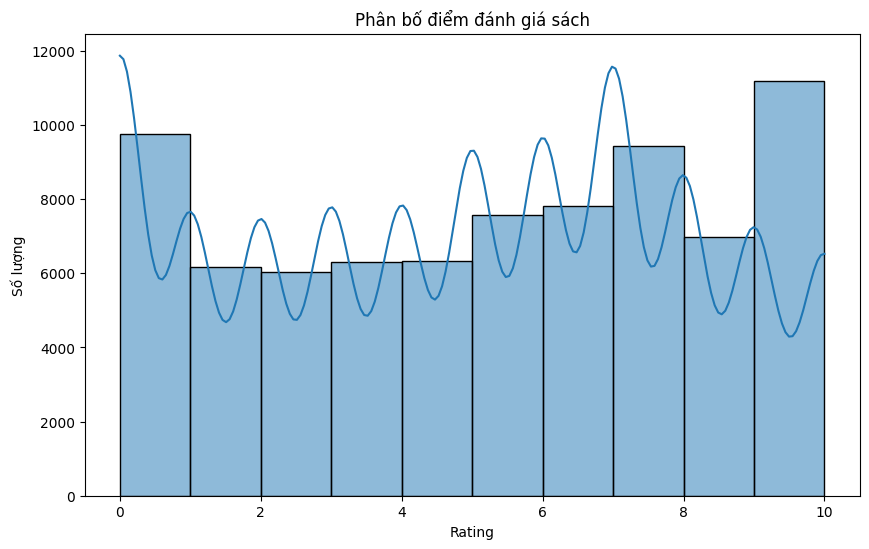

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data_Ratings['Book-Rating'], bins=10, kde=True)
plt.title('Phân bố điểm đánh giá sách')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

In [50]:
data_Ratings.rename(columns={'User-ID':'ID_User',
                     'ISBN':'ID_Book',
                      'Book-Rating':'Rating',},inplace=True)
data_Ratings.shape

(77567, 3)

### 2.4) Kết hợp dữ liệu các bảng và xử lý

In [51]:
data_Full = data_Users.merge(data_Books.merge(data_Ratings, on="ID_Book"), on="ID_User")
data_Full

,ID_User,Location,ID_Book,Name_Book,Author,Year,Publisher,Img_url,Rating
0,243,usa,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,4
1,243,usa,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,6
2,243,usa,042511774X,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,http://images.amazon.com/images/P/042511774X.0...,6
3,243,usa,0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,http://images.amazon.com/images/P/0345465083.0...,3
4,243,usa,0060977493,The God of Small Things,Arundhati Roy,1998,Perennial,http://images.amazon.com/images/P/0060977493.0...,7
...,...,...,...,...,...,...,...,...,...
76945,278843,usa,014028009X,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,8
76946,278843,usa,0679412956,Lasher,Anne Rice,1993,Alfred A. Knopf,http://images.amazon.com/images/P/0679412956.0...,8
76947,278843,usa,0440224594,The Return Journey,MAEVE BINCHY,1999,Dell,http://images.amazon.com/images/P/0440224594.0...,7
76948,278843,usa,0449223604,M Is for Malice,Sue Grafton,1998,Fawcett Books,http://images.amazon.com/images/P/0449223604.0...,0


In [53]:
data_Full.describe()

,ID_User,Rating
count,76950.000000,76950.000000
mean,141563.940091,4.830370
std,79640.277789,3.131239
min,243.000000,0.000000
25%,73044.000000,2.000000
50%,141710.000000,5.000000
75%,210822.000000,7.000000
max,278843.000000,10.000000


## 3.) Visualization 

In [54]:
data_Full.head(1)

,ID_User,Location,ID_Book,Name_Book,Author,Year,Publisher,Img_url,Rating
0,243,usa,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,4


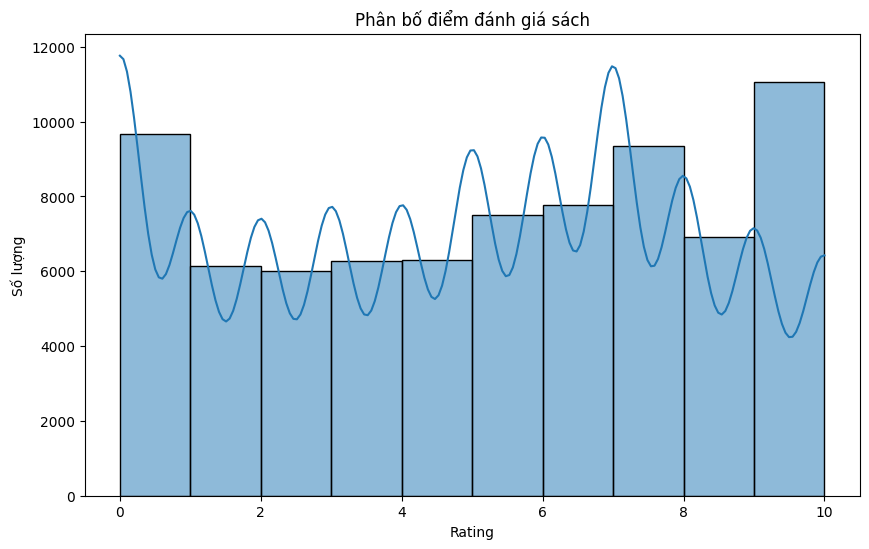

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data_Full['Rating'], bins=10, kde=True)
plt.title('Phân bố điểm đánh giá sách')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.show()

C:\Users\linh3\AppData\Local\Temp\ipykernel_5540\2489868447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Author', data=author_ratings.head(10), palette='viridis')


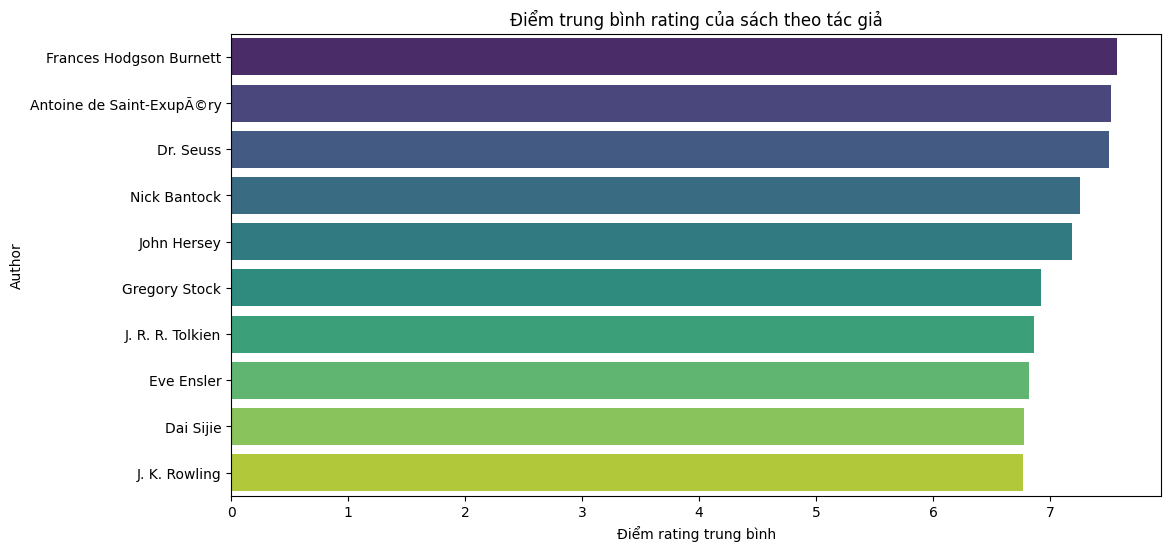

In [56]:
author_ratings = data_Full.groupby('Author')['Rating'].mean().reset_index()

author_ratings = author_ratings.sort_values('Rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Author', data=author_ratings.head(10), palette='viridis')
plt.title('Điểm trung bình rating của sách theo tác giả')
plt.xlabel('Điểm rating trung bình')
plt.ylabel('Author')
plt.show()

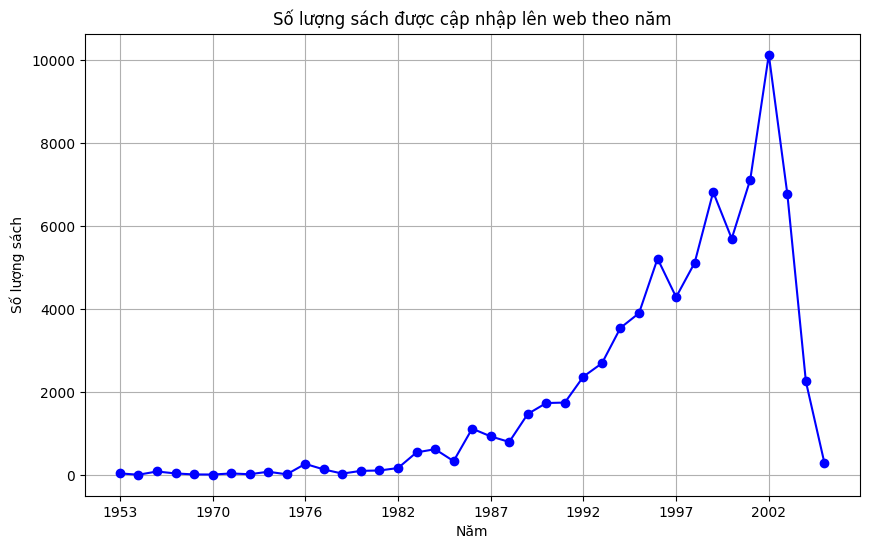

In [57]:
books_by_year = data_Full['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
books_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Số lượng sách được cập nhập lên web theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng sách')
plt.grid()

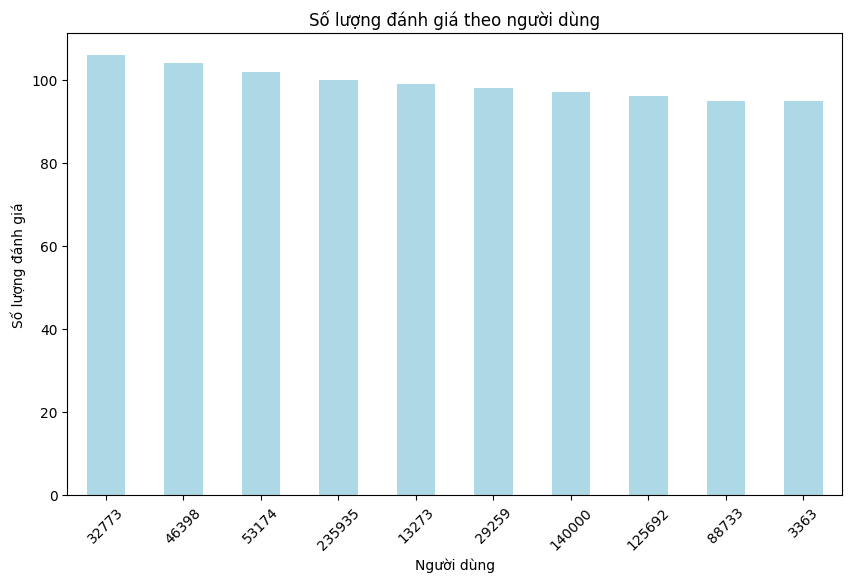

In [58]:
ratings_by_user = data_Full['ID_User'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ratings_by_user.plot(kind='bar', color='lightblue')
plt.title('Số lượng đánh giá theo người dùng')
plt.xlabel('Người dùng')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=45)
plt.show()

## 4.) Data preparation

In [59]:
# Tạo Utility matrix
Utility_matrix = data_Full.pivot_table(columns='ID_User', index='ID_Book', values='Rating')
Utility_matrix

ID_User,243,254,507,638,882,1131,1424,1435,1848,1903,...,277639,277965,278026,278137,278144,278188,278418,278535,278633,278843
ID_Book,,,,,,,,,,,,,,,,,,,,,
000649840X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007110928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002026478X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0020442203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002542730X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257228007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257229534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404148665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
print(Utility_matrix.isna().sum(axis=1))
Utility_matrix.isna().sum()

ID_Book
000649840X    1937
0007110928    1955
002026478X    1942
0020442203    1944
002542730X    1895
              ... 
3257228007    1959
3257229534    1961
3404148665    1959
3442541751    1961
3492045170    1959
Length: 2159, dtype: int64


ID_User
243       2103
254       2106
507       2124
638       2141
882       2109
          ... 
278188    2126
278418    2143
278535    2133
278633    2123
278843    2138
Length: 1963, dtype: int64

## 5.) Model

### 5.1) Xây dựng Model

In [61]:
def f_cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 0
    
    similarity = dot_product / (norm_vector1 * norm_vector2)
    
    return similarity

In [62]:
class CF(object):
    def __init__(self, k, sim_func = f_cosine_similarity, mode = "uu"):    
        self.k = k
        self.sim_func = sim_func
        self.mode = mode

        self.mean_ratings = None
        self.uti_matrix_Y = None
        self.simi_matrix_Y = None
        self.matrix_Y = None       
    
    def fit(self, matrix_Y):
        self.matrix_Y = matrix_Y
        self.n_users = matrix_Y.shape[1]  # số cột user
        self.n_items = matrix_Y.shape[0]   # số hàng item
        self.normalize()
        self.compute_similarity()

    def normalize(self):
        if self.mode == "uu":
            self.mean_ratings = np.nanmean(self.matrix_Y, axis=0)  # Tính trung bình theo cột
            self.uti_matrix_Y = self.matrix_Y - self.mean_ratings 
        else:
            self.mean_ratings = np.nanmean(self.matrix_Y, axis=1)  # Tính trung bình theo hàng
            self.uti_matrix_Y = (self.matrix_Y.T - self.mean_ratings).T

        self.uti_matrix_Y = np.nan_to_num(self.uti_matrix_Y, nan=0)

    def compute_similarity(self):
        if self.mode == "uu":
            self.simi_matrix_Y = np.ones((self.n_users, self.n_users))
            for u in range(self.n_users):
                self.simi_matrix_Y[u, :] = [self.sim_func(self.uti_matrix_Y[:, u], self.uti_matrix_Y[:, j]) for j in range(self.n_users)]
        else:
            self.simi_matrix_Y = np.ones((self.n_items, self.n_items))     
            for i in range(self.n_items):
                self.simi_matrix_Y[i, :] = [self.sim_func(self.uti_matrix_Y[i, :], self.uti_matrix_Y[j, :]) for j in range(self.n_items)]

    def predict(self, u, i):
        # Dự đoán đánh giá cho user u cho item i
        if self.mode == "uu":
            users_rated_i = np.where(~np.isnan(self.matrix_Y[i, :]))[0]
            sim = self.simi_matrix_Y[u, users_rated_i]
            k_rated_sim = np.argsort(sim)[-self.k:]
            k_users_rated = users_rated_i[k_rated_sim]
            score_u = self.uti_matrix_Y[i, k_users_rated]
            score_i = sim[k_rated_sim]
        else:
            items_rated_u = np.where(~np.isnan(self.matrix_Y[:, u]))[0]
            sim = self.simi_matrix_Y[i, items_rated_u]
            k_rated_sim = np.argsort(sim)[-self.k:]
            k_items_rated = items_rated_u[k_rated_sim]
            score_u = self.uti_matrix_Y[k_items_rated, u]
            score_i = sim[k_rated_sim]
        
        pred_rating = np.sum(score_i * score_u) / np.sum(np.abs(score_i))
        
        # giá trị thực tế
        if self.mode == "uu":
            return pred_rating + self.mean_ratings[u] 
        else:
            return pred_rating + self.mean_ratings[i]

    def recommend(self, x):
        pred_ratings = []
        if self.mode == "uu":
            for i in range(self.n_items):
                if np.isnan(self.matrix_Y[i, x]):
                    pred_rating = self.predict(x, i)
                    pred_ratings.append((i, pred_rating))
        else:
            for u in range(self.n_users):
                if np.isnan(self.matrix_Y[x, u]):
                    pred_rating = self.predict(u, x)
                    pred_ratings.append((u, pred_rating))

        pred_ratings.sort(key=lambda x: x[1], reverse=True)
        top_pred_ratings = pred_ratings[:10]

        if self.mode == "uu":
            print(f"Các gợi ý cho user {x}:")
            for item, rating in top_pred_ratings:
                if rating > 5:
                    print(f"\t item {item} với giá trị dự đoán: {round(rating, 2)}")
        else:
            print(f"Các gợi ý cho item {x}:")
            for user, rating in top_pred_ratings:
                if rating > 5:
                    print(f"\t user {user} với giá trị dự đoán: {round(rating, 2)}")

        return top_pred_ratings

In [63]:
matrix_Y = Utility_matrix.values
model = CF(k=300, sim_func = f_cosine_similarity, mode="uu")
model.fit(matrix_Y)
idx_books = model.recommend(0)

Các gợi ý cho user 0:
	 item 1856 với giá trị dự đoán: 7.34
	 item 394 với giá trị dự đoán: 7.18
	 item 576 với giá trị dự đoán: 7.16
	 item 1327 với giá trị dự đoán: 7.09
	 item 143 với giá trị dự đoán: 7.02
	 item 1952 với giá trị dự đoán: 7.0
	 item 1503 với giá trị dự đoán: 7.0
	 item 1673 với giá trị dự đoán: 6.87
	 item 1712 với giá trị dự đoán: 6.59
	 item 158 với giá trị dự đoán: 6.5


C:\Users\linh3\AppData\Local\Temp\ipykernel_5540\156936638.py:56: RuntimeWarning: invalid value encountered in scalar divide
  pred_rating = np.sum(score_i * score_u) / np.sum(np.abs(score_i))


### 5.2 Test k 

## 6.) Các dữ liệu gợi ý thực sau khi dự đoán

In [69]:
def find_index_user(Utility_matrix, user_id):
    try:
        index = Utility_matrix.columns.get_loc(user_id)
        return index
    except KeyError:
        return f"User-ID {user_id} không tồn tại."
    
def find_id_book(Utility_matrix, index):
    try:
        title = Utility_matrix.index[index]
        return title
    except KeyError:
        return f"Index title {title} không tồn tại."

### 6.1) Test k

In [70]:
k_values = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]


# Vòng lặp để thử nghiệm từng giá trị k
for k in k_values:
    print("Với k:", k)
    idx_books = []
    id_books = []
    title_books = []
    img_books = []
    # Tạo mô hình Collaborative Filtering với giá trị k hiện tại
    model = CF(k=k, sim_func=f_cosine_similarity, mode="uu")
    model.fit(matrix_Y)
    idx_books = model.recommend(find_index_user(Utility_matrix, 254))
    idx_books = [item[0] for item in idx_books]
    for i in range(len(idx_books)):
        id_books.append(find_id_book(Utility_matrix, idx_books[i]))
    # Lấy tên sách và URL hình ảnh từ DataFrame
    for id_book in id_books:
        title = data_Full[data_Full['ID_Book'] == id_book]['Name_Book'].unique() 
        title_books.append(title[0] if len(title) > 0 else None)  # Tránh lỗi nếu không có tên
        img_url = data_Full[data_Full['ID_Book'] == id_book]['Img_url'].unique() 
        img_books.append(img_url[0] if len(img_url) > 0 else None)  # Tránh lỗi nếu không có
    print("\n".join(title_books) + "\n")
    print("\n".join(img_books) + "\n")

Với k: 50
Các gợi ý cho user 1:
	 item 1295 với giá trị dự đoán: 8.76
	 item 710 với giá trị dự đoán: 8.71
	 item 696 với giá trị dự đoán: 8.63
	 item 103 với giá trị dự đoán: 8.46
	 item 158 với giá trị dự đoán: 8.34
	 item 172 với giá trị dự đoán: 8.1
	 item 148 với giá trị dự đoán: 8.05
	 item 72 với giá trị dự đoán: 7.99
	 item 1887 với giá trị dự đoán: 7.93
	 item 1656 với giá trị dự đoán: 7.91
Sense and Sensibility
The Bear and the Dragon
The Cat in the Hat
Pigs in Heaven
Out to Canaan (The Mitford Years)
The Westing Game (Now in Speak!)
84 Charing Cross Road
Skinwalkers (Joe Leaphorn/Jim Chee Novels)
Christmas Box (Christmas Box Trilogy)
Charlotte's Web

http://images.amazon.com/images/P/0451187903.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/039914563X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/039480001X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/006109868X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0140265686.01.LZZZZZZZ.jpg
http://images.amazon.com/

In [71]:
k_values = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]


# Vòng lặp để thử nghiệm từng giá trị k
for k in k_values:
    print("Với k:", k)
    idx_books = []
    id_books = []
    title_books = []
    img_books = []
    # Tạo mô hình Collaborative Filtering với giá trị k hiện tại
    model = CF(k=k, sim_func=f_cosine_similarity, mode="uu")
    model.fit(matrix_Y)
    idx_books = model.recommend(find_index_user(Utility_matrix, 254))
    idx_books = [item[0] for item in idx_books]
    for i in range(len(idx_books)):
        id_books.append(find_id_book(Utility_matrix, idx_books[i]))
    # Lấy tên sách và URL hình ảnh từ DataFrame
    for id_book in id_books:
        title = data_Full[data_Full['ID_Book'] == id_book]['Name_Book'].unique() 
        title_books.append(title[0] if len(title) > 0 else None)  # Tránh lỗi nếu không có tên
        img_url = data_Full[data_Full['ID_Book'] == id_book]['Img_url'].unique() 
        img_books.append(img_url[0] if len(img_url) > 0 else None)  # Tránh lỗi nếu không có
    print("\n".join(title_books) + "\n")
    print("\n".join(img_books) + "\n")

Với k: 10
Các gợi ý cho user 1:
	 item 2117 với giá trị dự đoán: 9.88
	 item 882 với giá trị dự đoán: 9.88
	 item 1887 với giá trị dự đoán: 9.55
	 item 1437 với giá trị dự đoán: 9.51
	 item 2045 với giá trị dự đoán: 9.43
	 item 1007 với giá trị dự đoán: 9.37
	 item 1992 với giá trị dự đoán: 9.3
	 item 696 với giá trị dự đoán: 9.11
	 item 1658 với giá trị dự đoán: 9.02
	 item 1295 với giá trị dự đoán: 8.81
Life's Little Instruction Book (Life's Little Instruction Books (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Christmas Box (Christmas Box Trilogy)
The Absence of Nectar
Ender's Game (Ender Wiggins Saga (Paperback))
Leap of Faith
Ice Bound: A Doctor's Incredible Battle for Survival at the South Pole
The Cat in the Hat
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Sense and Sensibility

http://images.amazon.com/images/P/1558531025.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139600.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0684814994.01.L

In [74]:
data_Full[data_Full['ID_User'] == 254]

,ID_User,Location,ID_Book,Name_Book,Author,Year,Publisher,Img_url,Rating
56,254,usa,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,7
57,254,usa,0316769487,The Catcher in the Rye,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,4
58,254,usa,0440241413,Confessions of a Shopaholic,SOPHIE KINSELLA,2003,Dell,http://images.amazon.com/images/P/0440241413.0...,1
59,254,usa,0451526341,Animal Farm,George Orwell,2004,Signet,http://images.amazon.com/images/P/0451526341.0...,8
60,254,usa,0684833395,Catch 22,Joseph Heller,1996,Simon &amp; Schuster,http://images.amazon.com/images/P/0684833395.0...,2
61,254,usa,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,9
62,254,usa,0452277337,Le Divorce (William Abrahams Book),Diane Johnson,1997,Plume Books,http://images.amazon.com/images/P/0452277337.0...,1
63,254,usa,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,7
64,254,usa,0060934719,stardust,Neil Gaiman,2001,Perennial,http://images.amazon.com/images/P/0060934719.0...,3
65,254,usa,0446364762,The Stars Shine Down,Sidney Sheldon,1993,Warner Books,http://images.amazon.com/images/P/0446364762.0...,3


In [75]:
# k = 40 hợp lý 
matrix_Y = Utility_matrix.values
model = CF(k=40, sim_func = f_cosine_similarity, mode="uu")
model.fit(matrix_Y)
idx_books = model.recommend(find_index_user(Utility_matrix, 254))
idx_books

Các gợi ý cho user 1:
	 item 1295 với giá trị dự đoán: 8.76
	 item 710 với giá trị dự đoán: 8.71
	 item 696 với giá trị dự đoán: 8.63
	 item 882 với giá trị dự đoán: 8.62
	 item 103 với giá trị dự đoán: 8.46
	 item 158 với giá trị dự đoán: 8.34
	 item 2045 với giá trị dự đoán: 8.28
	 item 1658 với giá trị dự đoán: 8.14
	 item 172 với giá trị dự đoán: 8.1
	 item 2118 với giá trị dự đoán: 8.06


[(1295, 8.75765480595858),
 (710, 8.705325999203373),
 (696, 8.630292216682554),
 (882, 8.619366128355416),
 (103, 8.460036478917733),
 (158, 8.342187810054599),
 (2045, 8.283820337241076),
 (1658, 8.144043871662824),
 (172, 8.10103269779247),
 (2118, 8.057914875615927)]

In [76]:
idx_books = [item[0] for item in idx_books]
idx_books

[1295, 710, 696, 882, 103, 158, 2045, 1658, 172, 2118]

In [77]:
id_books = []

print("Các sách được gợi ý:")
for i in range(len(idx_books)):
    id_books.append(find_id_book(Utility_matrix, idx_books[i]))
id_books

Các sách được gợi ý:


['0451187903',
 '039914563X',
 '039480001X',
 '0439139600',
 '006109868X',
 '0140265686',
 '0812550706',
 '059035342X',
 '0140386645',
 '155874262X']

In [78]:
# Các title book từ id
title_books = []
for i in id_books:
    title = data_Full[data_Full['ID_Book'] == i]['Name_Book'].unique() 
    title_books.append(title[0])
title_books

['Sense and Sensibility',
 'The Bear and the Dragon',
 'The Cat in the Hat',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Pigs in Heaven',
 'Out to Canaan (The Mitford Years)',
 "Ender's Game (Ender Wiggins Saga (Paperback))",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'The Westing Game (Now in Speak!)',
 'Chicken Soup for the Soul (Chicken Soup for the Soul)']

In [79]:
# Các Img_url book từ id
img_books = []
for i in id_books:
    img_url = data_Full[data_Full['ID_Book'] == i]['Img_url'].unique() 
    img_books.append(img_url[0])
img_books

['http://images.amazon.com/images/P/0451187903.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/039914563X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/039480001X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0439139600.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/006109868X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0140265686.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0812550706.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0140386645.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/155874262X.01.LZZZZZZZ.jpg']

## 7.) Lưu Model và deploy

In [ ]:
# joblib.dump(model, 'checkpoints/model.pkl')
# joblib.dump(data_Full, 'checkpoints/data_Full.pkl')
# joblib.dump(Utility_matrix, 'checkpoints/Utility_matrix.pkl')

['checkpoints/Utility_matrix.pkl']